In [1]:
                                        ## install necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from unicodedata import normalize


In [2]:
#proide a variable for the html link 
url="https://www.livingin-canada.com/food-prices-canada.html"


In [3]:
#Method one
#use read_html method to extract all tables from the url by creating a dataframe 
#we specifiy the table we want using a match method which uses a statement with in the table 
#this gives a list so we use index selectors to select the dataframe
table_pr=pd.read_html(url,match="Item")
table_pr[0].info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            52 non-null     object 
 1   Quantity        52 non-null     object 
 2   2020 Price ($)  52 non-null     float64
 3   2018 Price ($)  52 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


In [4]:
#method 2 
#we use index selectors directly onto the frame created 
df=pd.read_html(url)
df[0]

,Item,Quantity,2020 Price ($),2018 Price ($)
0,NaN,NaN,NaN,NaN
1,Round steak,1 kg,17.38,18.50
2,Sirloin steak,1 kg,22.51,22.54
3,Prime rib roast,1 kg,33.23,32.02
4,Blade roast,1 kg,16.74,16.51
5,Stewing beef,1 kg,15.96,16.05
6,"Ground beef, regular",1 kg,11.95,12.53
7,Pork chops,1 kg,12.15,12.30
8,Chicken,1 kg,7.21,7.50
9,Bacon,500 g,7.21,6.79


In [61]:
# converting the second column to float wont work because of the c and dollar signs
new_col={"Item":"Item","Quantity":"Quantity","2020 Price ($)":2020,"2018 Price ($)":2018}
df[0].replace(new_col,inplace=True)

In [62]:
# we identify the row that does not serve us  using the iloc method because our rows are indices 
df[0].iloc[0]

Item    Round steak
2020          17.38
2018           18.5
Name: 1, dtype: object

In [6]:
# we dro that row from the dataframe'(df[0])' not df is a list object created from our dataframe 
df[0].drop([0], axis=0, inplace=True)

In [9]:
# check if row is dropped 
df[0]

,Item,Quantity,2020 Price ($),2018 Price ($)
1,Round steak,1 kg,17.38,18.50
2,Sirloin steak,1 kg,22.51,22.54
3,Prime rib roast,1 kg,33.23,32.02
4,Blade roast,1 kg,16.74,16.51
5,Stewing beef,1 kg,15.96,16.05
6,"Ground beef, regular",1 kg,11.95,12.53
7,Pork chops,1 kg,12.15,12.30
8,Chicken,1 kg,7.21,7.50
9,Bacon,500 g,7.21,6.79
10,Wieners,450 g,5.13,4.43


In [10]:
# we rename or replace the headers ;;columns;;
df[0].rename(columns={'Item':'Item', 'Quantity':'Quantity', '2020 Price ($)':2020, '2018 Price ($)':2018},inplace=True)
#check if the changes have been made 
df[0]

,Item,Quantity,2020,2018
1,Round steak,1 kg,17.38,18.50
2,Sirloin steak,1 kg,22.51,22.54
3,Prime rib roast,1 kg,33.23,32.02
4,Blade roast,1 kg,16.74,16.51
5,Stewing beef,1 kg,15.96,16.05
6,"Ground beef, regular",1 kg,11.95,12.53
7,Pork chops,1 kg,12.15,12.30
8,Chicken,1 kg,7.21,7.50
9,Bacon,500 g,7.21,6.79
10,Wieners,450 g,5.13,4.43


In [11]:
# recheck out datafrmae information types ;;;datatypes;;
df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item      52 non-null     object 
 1   Quantity  52 non-null     object 
 2   2020      52 non-null     float64
 3   2018      52 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


In [12]:
df[0].get("Item").astype(str)
df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item      52 non-null     object 
 1   Quantity  52 non-null     object 
 2   2020      52 non-null     float64
 3   2018      52 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


In [13]:
#we use the len function to determine how many tables we have 
print("total number of Tables is:",len(table_pr))

total number of Tables is: 1


In [14]:
# we fetch tables from our dataframe usingindices and assigning them a variable 
#table_pr[0]
#or 
df[0]


,Item,Quantity,2020,2018
1,Round steak,1 kg,17.38,18.50
2,Sirloin steak,1 kg,22.51,22.54
3,Prime rib roast,1 kg,33.23,32.02
4,Blade roast,1 kg,16.74,16.51
5,Stewing beef,1 kg,15.96,16.05
6,"Ground beef, regular",1 kg,11.95,12.53
7,Pork chops,1 kg,12.15,12.30
8,Chicken,1 kg,7.21,7.50
9,Bacon,500 g,7.21,6.79
10,Wieners,450 g,5.13,4.43


In [15]:
#I delete the columns that I have no use for 
del df[0]["Quantity"]
#and check if the column is really dropped 
df[0].columns


Index(['Item', 2020, 2018], dtype='object')

In [16]:
df[0]

,Item,2020,2018
1,Round steak,17.38,18.50
2,Sirloin steak,22.51,22.54
3,Prime rib roast,33.23,32.02
4,Blade roast,16.74,16.51
5,Stewing beef,15.96,16.05
6,"Ground beef, regular",11.95,12.53
7,Pork chops,12.15,12.30
8,Chicken,7.21,7.50
9,Bacon,7.21,6.79
10,Wieners,5.13,4.43


In [59]:
#To get the total price amount for each year 
df[0][0:52].sum()

Item    Round steakSirloin steakPrime rib roastBlade r...
2020                                                502.4
2018                                               538.08
dtype: object

In [60]:
#To get average for each year 
df[0][0:52].mean()


C:\Users\MIKE\AppData\Local\Temp\ipykernel_11676\2734314815.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[0][0:52].mean()


2020     9.661538
2018    10.347692
dtype: float64

In [17]:
#we convert the series into a datafrmae
df2018 = pd.DataFrame(df[0][2018])
df2018
#we can get the total sum of the products for 2018
df2018[0:52].sum()
                    

2018    538.08
dtype: float64

In [18]:
#we do the same thing we did above for 2020 products 
df2020 = pd.DataFrame(df[0][2020])
df2020[0:52].sum()

2020    502.4
dtype: float64

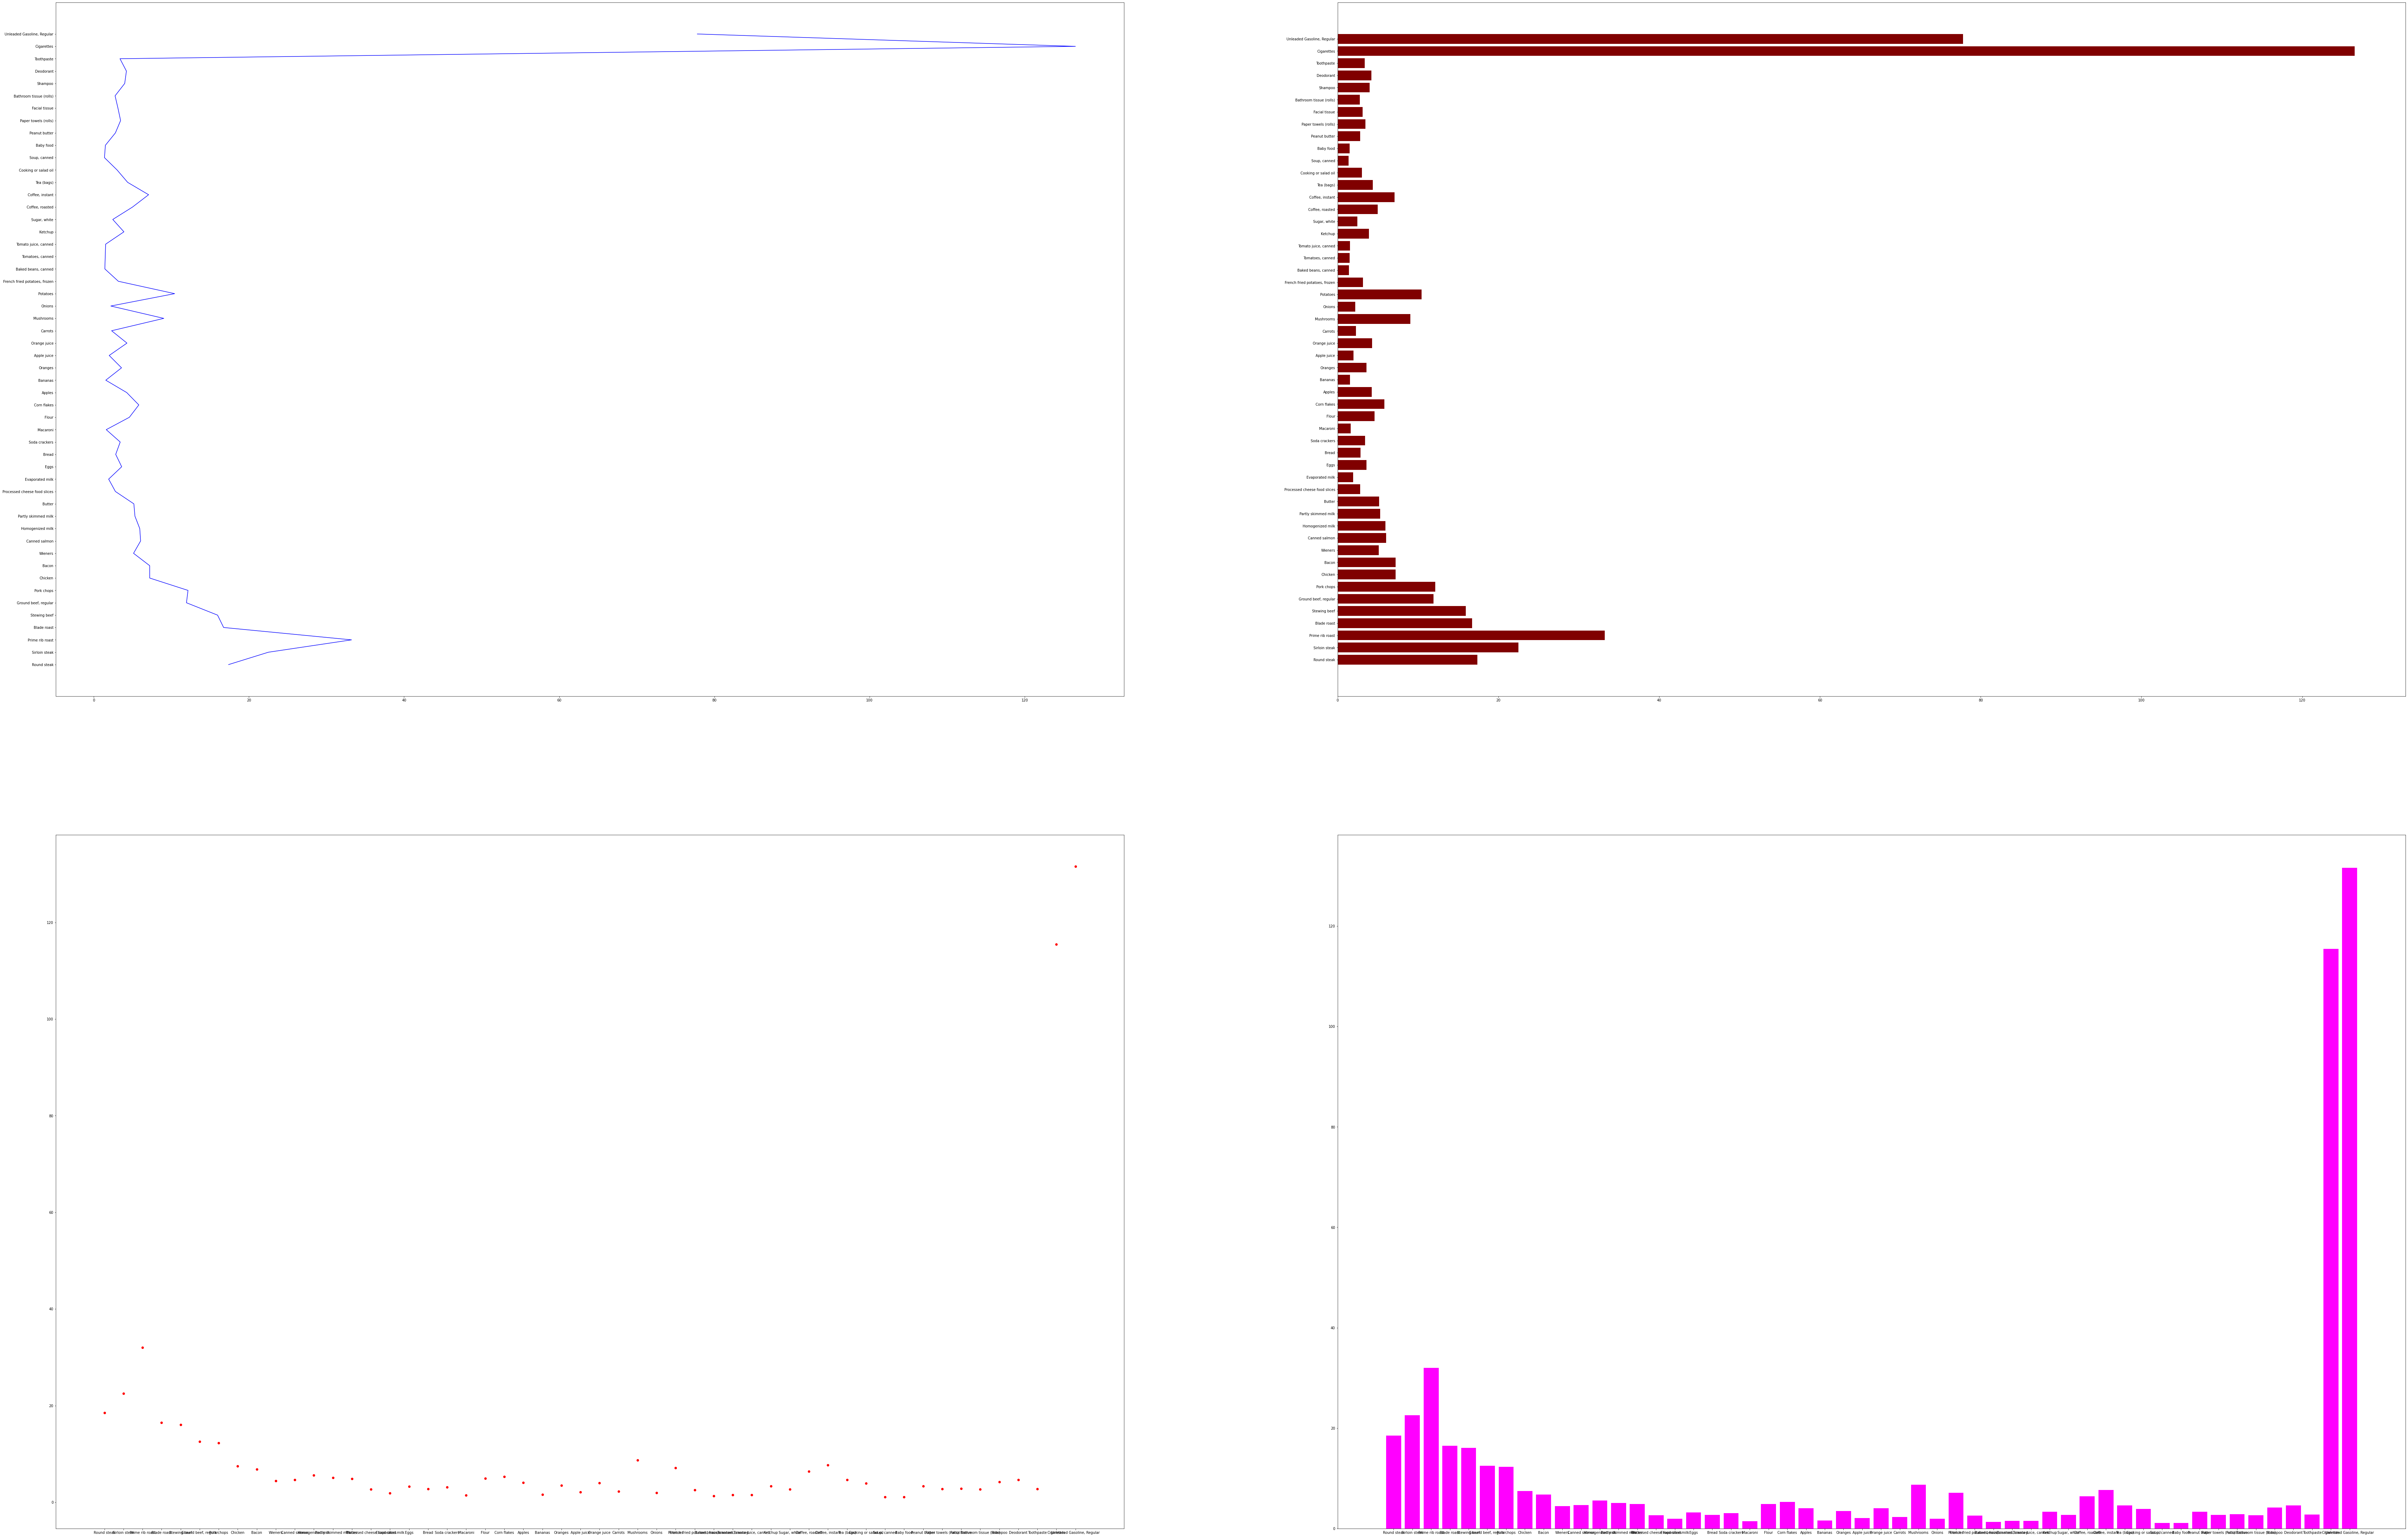

In [21]:
##we can plot this data using the series instead of the dataframes 
# call upon the 
plt.figure(figsize=(120,80))
plt.subplot(2,2,1)
y=df[0]["Item"]
x=df[0][2020]
x.label="Product Price for 2020"
y.label="Product Items for 2020"
plt.plot(x,y, color="blue")
plt.subplot(2,2,2)
x=df[0]["Item"]
y=df[0][2020]
x.label="Product Price for 2018"
y.label="Product Items for 2018"
title="A DASHBOARD SHOWING GROCERY PRICES BETWEEN 2018 TO 2020"
plt.barh(x,y, color="maroon")
plt.subplot(2,2,3)
x=df[0]["Item"]
y=df[0][2018]
x.label="Product Price for 2018"
y.label="Product Items for 2018"
plt.scatter(x,y, color="red")
plt.subplot(2,2,4)
x=df[0]["Item"]
y=df[0][2018]
x.label="Product Price for 2018"
y.label="Product Items for 2018"
plt.bar(x,y, color="magenta")
plt.show()




<AxesSubplot:>

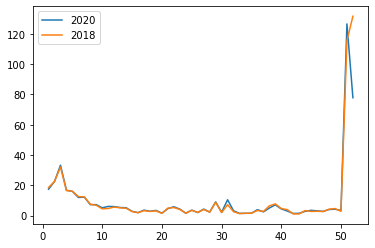

In [306]:
# after droppping column we can use the dataframe plot to show our data 

df[0].plot()
